## 데이터4 카테고리 기반 문제 유형
<img src="./category_1.png" width="600">

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import pandas as pd
import numpy as np
import json
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from PIL import Image, ImageDraw
import cv2
import random

import matplotlib
import matplotlib.pyplot as plt

is correct? : True


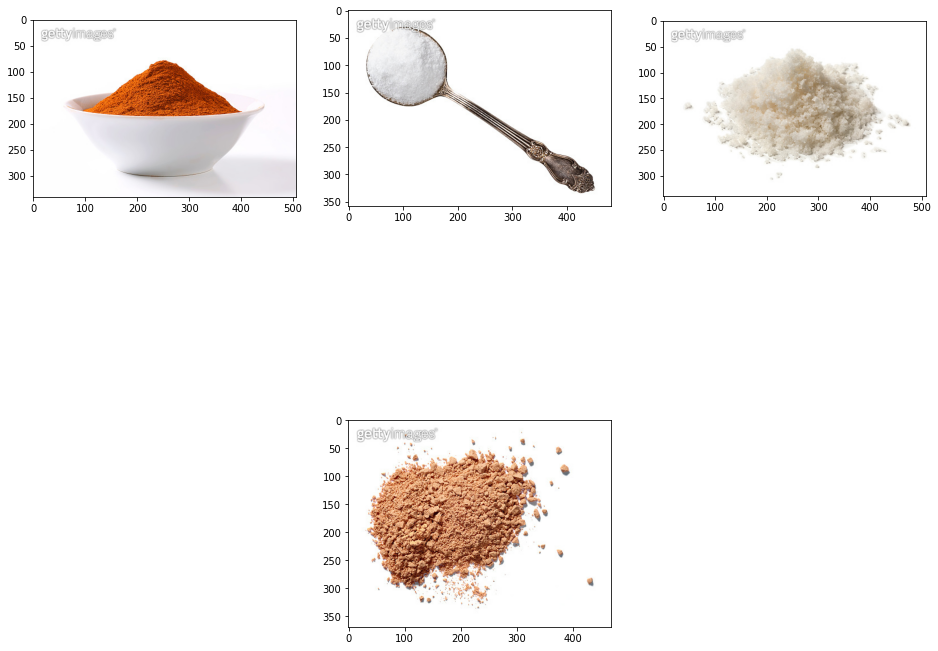

In [3]:
import os
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
folder_name = os.listdir("./datasets/similarity2/")[3]
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/datasets/similarity2/{folder_name}')

file_list = os.listdir(f"./")
for file_name in file_list:
    if file_name.endswith('.json'):
        json_file = file_name
        file_list.remove(file_name)
"""
print(f'jpg_list : {file_list}')
print(f'json_file : {json_file}')
"""

a_data = json.load(open(f'./{json_file}'))
answer = a_data['Answers'][0]['images'][0]['image_url']

file_list.remove(answer)

print(f"is correct? : {a_data['is_correct']}")

plt.figure(figsize=(16, 14))

for i in range(len(file_list)):
    question_img = Image.open(f'./{file_list[i]}')
    plt.subplot(2, len(file_list), i+1)
    plt.imshow(question_img)

#plot answer image
answer_img = Image.open(f'./{answer}')
plt.subplot(2, len(file_list), int(len(file_list)*3/2)+1)
plt.imshow(answer_img)
plt.show()

In [4]:
os.chdir(f'/home/ktlim/Visual_Reasoning/task1')
print(f'Total #Data : {len(os.listdir("./datasets/similarity2/"))}')

Total #Data : 234


In [5]:
!pwd

/home/ktlim/Visual_Reasoning/task1


In [6]:
# import shutil
# shutil.rmtree(f'./category_data/category_1/200249')

In [7]:
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
folder_name = sorted(os.listdir("./datasets/similarity2/"))

question_img_1 = []
question_img_2 = []
question_img_3 = []
answer_img_arr = []
label = []

try_count = 0
except_count = 0



for elements in folder_name:
    file_list = os.listdir(f"./datasets/similarity2/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./datasets/similarity2/{elements}/{json_file}'))
    
    try:
        answer = a_data['Answers'][0]['images'][0]['image_url']
        file_list.remove(answer)
        label.append(a_data['is_correct'])
        question_img_1.append(file_list[0])
        question_img_2.append(file_list[1])
        question_img_3.append(file_list[2])

        answer_img_arr.append(answer)
        try_count += 1
    except:
        print(f'Error : {elements}')
        folder_name.remove(elements)
        except_count += 1



In [8]:
len(folder_name)

234

In [9]:
print(try_count, except_count)

234 0


In [10]:
print(len(question_img_1))
print(len(question_img_2))
print(len(question_img_3))
print(len(folder_name))
print(len(answer_img_arr))


234
234
234
234
234


In [11]:
df = pd.DataFrame(zip(folder_name, question_img_1,question_img_2, question_img_3, answer_img_arr, label), columns=['folder_name', 'img_1', 'img_2', 'img_3', 'answer_img', 'label'])
df

,folder_name,img_1,img_2,img_3,answer_img,label
0,001003,01115b972a82491886c44e5fcf6c0760.jpg,3616fb6a97d64f159035d1397ef1e338.jpg,6b8872d07b284851b0fdfd592c14157d.jpg,71b028feb04d4d0aaef3856c0578aeac.jpg,True
1,001007,f28bbccaeef94671bd888bf066836d88.jpg,a36722a4b39d4b7a9d2a6f212f3709e7.jpg,54f9456c4b734e46aa033041d1db9933.jpg,4e7c7523ab494f53948f1082759dedf7.jpg,True
2,001013,e80502f902e44e0bb0bdcf43099b3c06.jpg,ed5b59e4f1924968a1a125b66944631e.jpg,0be5eca4f37846b6baa0b8b9738178d6.jpg,9138002f0a3f449eb28994c376847422.jpg,True
3,001025,58aa1b8edbd2477487be194a2aa8d801.jpg,3a9db65bfa314ae69a54d7e68bb2a4cd.jpg,471b08580fea42519dc6b6252e5e9e03.jpg,3d70d0acb62f4874a8974450c4dc1162.jpg,True
4,001031,842b02583f484c519987233c264716e8.jpg,eb48c095eaf8407c8c50bc540c83c0b1.jpg,6f29626bc66742cb8be97b79b7080d20.jpg,3c79ae50b37a44a2ae745b19e88ba68a.jpg,True
...,...,...,...,...,...,...
229,045486,a57c085963c44baf933ec607b1b5a143.jpg,e1bf13a9741e42e79de10445ab9e24b2.jpg,a3564c6da87a4047949df6724deeb831.jpg,d2870f9e3d714de89e333c47100d1df8.jpg,True
230,045508,2664b5aa7c544444a5fee8b1e483add7.jpg,1098357c719f48e09ebbf0b27c0222b6.jpg,2fe250e0a5bb4c09be8deba558f57d68.jpg,0605f0eff0be4855aa61804cd7cf0e0b.jpg,True
231,045602,acc475e01f784ddfa89ffc691b42c0c0.jpg,031f58e58b1e45c4814d399ca9ac9f09.jpg,22160c321f4843a18edaff90948020e6.jpg,e6c32dae4a794498b29fdaedfd948991.jpg,True
232,045927,31f1308b8d46470c9ca8c90d0f0fa93a.jpg,7b385fe2b6f54480b56277c4a9935742.jpg,74d69bb6509b44d18e11dcc36b8857b2.jpg,2721157077f74b96907aa8f51219f689.jpg,True


In [12]:
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.RandomCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [13]:
class Category1_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, config=None, transform=None):
        self.df = df
        self.config = config
        self.transform = transform
        
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        
        folder = sample[0]+'/'

        img_1_path = './datasets/similarity2/'+folder+sample[1]
        img_2_path = './datasets/similarity2/'+folder+sample[2]
        img_3_path = './datasets/similarity2/'+folder+sample[3]

        ans_img_path = './datasets/similarity2/'+folder+sample[4]
        label = sample[5]

        
        img_1_feature = Image.open(img_1_path).convert('RGB')
        img_2_feature = Image.open(img_2_path).convert('RGB') 
        img_3_feature = Image.open(img_3_path).convert('RGB')  
        img_ans_feature = Image.open(ans_img_path).convert('RGB')
        
        img_1_feature = self.transform(img_1_feature)  
        img_2_feature = self.transform(img_2_feature)  
        img_3_feature = self.transform(img_3_feature)  
        img_ans_feature = self.transform(img_ans_feature)        
        
        return {
            "label": label,
            "img_1": img_1_feature,
            "img_2": img_2_feature,
            "img_3": img_3_feature,
            "answer": img_ans_feature
        }
        
    

In [14]:
def make_sequential(in_channels, out_channels, *args, **kwargs):
    return nn.Sequential(nn.Conv2d(in_channels, out_channels, *args, **kwargs),
           nn.BatchNorm2d(out_channels),
           nn.ReLu(),
           nn.MaxPool2d(*args, **kwargs))

class VRCategory(nn.Module):
    def __init__(self, config):
        super(VRCategory, self).__init__()
        
        self.config = config
        self.backborne = torchvision.models.resnet50(pretrained=True)
        self.backborne.fc = nn.Linear(self.backborne.fc.in_features, self.config.input_dim)
        self.fc = nn.Sequential(
                    nn.Linear(self.config.input_dim*4, self.config.mlp_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(self.config.mlp_hidden, 2), 
        )

    def forward(self, samples):
        
        #Question Image Feature
        q_img1 = self.backborne(samples["img_1"])
        q_img2 = self.backborne(samples["img_2"])
        q_img3 = self.backborne(samples["img_3"])

        
        #Answer1 Image Feature
        a_img = self.backborne(samples["answer"])

        
        
        q_a1 = torch.cat([q_img1, q_img2, q_img3, a_img], axis=1)
        
        q_a1_logit = self.fc(q_a1)
        
        return {
            "q_a1_logit": F.log_softmax(q_a1_logit, dim=1),
        }


In [15]:
def train_fn(model, train_loader, optimizer, loss_fn, config):
    
    total_count_correct = 0
    total_num_example = 0
    total_loss = []
    
    model.train()
    device = "cuda"
    
    for batch in tqdm(train_loader):          
        
        #Question Image Feature
        batch["img_1"] = batch["img_1"].to(device)
        batch["img_2"] = batch["img_2"].to(device)
        batch["img_3"] = batch["img_3"].to(device)

        
        #Answer Image Feature
        batch["answer"] = batch["answer"].to(device)

        #Label : True or False
        batch["label"] = batch["label"].to(device)
        
        logits = model(batch)

        target = batch["label"].long().to(device)
        loss = loss_fn(logits["q_a1_logit"].squeeze(), target)
        
        total_loss.append(loss.item())
        
        predicted = logits["q_a1_logit"].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct = total_count_correct + torch.sum(predicted == target).item()
        total_num_example = total_num_example + target.size(0)



        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("TRAIN_LOSS:", str(sum(total_loss)/total_num_example) + " TRAIN_Accuracy: " + str(total_count_correct/total_num_example) )
    return sum(total_loss)/total_num_example, total_count_correct/total_num_example


In [16]:
def valid_fn(model, valid_loader, config):
    
    total_count_correct = 0
    total_num_example = 0
    device = "cuda"
    total_loss = []
    
    model.eval()
    with torch.no_grad():
        for batch in tqdm(valid_loader):          
            
            #Question Image Feature
            batch["img_1"] = batch["img_1"].to(device)
            batch["img_2"] = batch["img_2"].to(device)
            batch["img_3"] = batch["img_3"].to(device)

            #Answer Image Feature    
            batch["answer"] = batch["answer"].to(device)

            #Label : True or False
            batch["label"] = batch["label"].to(device)

            logits = model(batch)
            target = batch["label"].long().to(device)
            
            loss = loss_fn(logits["q_a1_logit"].squeeze(), target)
            total_loss.append(loss.item())
        
            predicted_a1 = logits["q_a1_logit"].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct = total_count_correct + torch.sum(predicted_a1 == target).item()
            total_num_example = total_num_example + target.size(0)

        print("Valid Accuracy: " + str(total_count_correct/total_num_example))
    return sum(total_loss)/total_num_example, total_count_correct/total_num_example


In [17]:
class Config:
    def __init__(self, args=None):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.distributed = False
        self.gpu_id = "0,1"
        self.input_dim = 512
        self.mlp_hidden = 1024
        self.n_epoch = 8

config = Config()

In [18]:
train_df, valid_df = train_test_split(df)

train_datasets = Category1_Dataset(train_df, transform=transform)
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=32,  num_workers=32)

valid_datasets = Category1_Dataset(valid_df, transform=transform)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=32,  num_workers=32)

model = VRCategory(config)
#vrs1_model = torch.nn.DataParallel(vrs1_model)
model = model.to(config.device)
if config.distributed:
    #vrs1_model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[config.gpu])    
    model = torch.nn.parallel.DistributedDataParallel(model)    

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.NLLLoss(reduction="sum")


In [19]:
train_loss_list = []
train_acc_list = []

vali_loss_list = []
vali_acc_list = []


for epoch in range(config.n_epoch):
    train_loss, train_acc = train_fn(model, train_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, config=config)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    
    vali_loss, vali_acc = valid_fn(model, valid_loader=valid_loader, config=config)
    vali_loss_list.append(vali_loss)
    vali_acc_list.append(vali_acc)
torch.save(model.state_dict(), '/home/ktlim/Visual_Reasoning/task1/smilarity2.pt')

100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


TRAIN_LOSS: 0.26063044232981547 TRAIN_Accuracy: 0.8628571428571429


100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


TRAIN_LOSS: 0.0007603714984309461 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


TRAIN_LOSS: 2.985667394698664e-06 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


TRAIN_LOSS: 7.62939330505625e-08 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


TRAIN_LOSS: 1.362391799375473e-09 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


TRAIN_LOSS: 0.0 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.73s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


TRAIN_LOSS: 0.0 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.73s/it]


Valid Accuracy: 1.0


100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


TRAIN_LOSS: 0.0 TRAIN_Accuracy: 1.0


100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

Valid Accuracy: 1.0


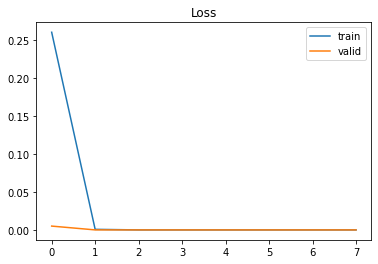

In [21]:
import matplotlib.pyplot as plt

epochs = np.arange(config.n_epoch)

plt.title('Loss') 
plt.plot(epochs, train_loss_list, label="train") 
plt.plot(epochs, vali_loss_list, label="valid") 
plt.legend()
plt.show()

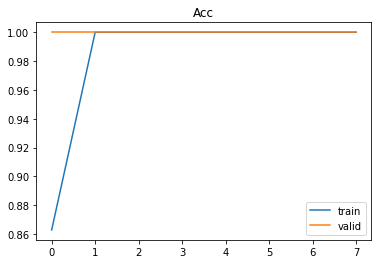

In [23]:
plt.title('Acc') 
plt.plot(epochs, train_acc_list, label="train") 
plt.plot(epochs, vali_acc_list, label="valid") 
plt.legend()
plt.show()